# Projeto 1 "Online Retail"

Data Set disponibilizado pela UC Irvine Macbine Leaning Repository em https://archive.ics.uci.edu/dataset/352/online+retail

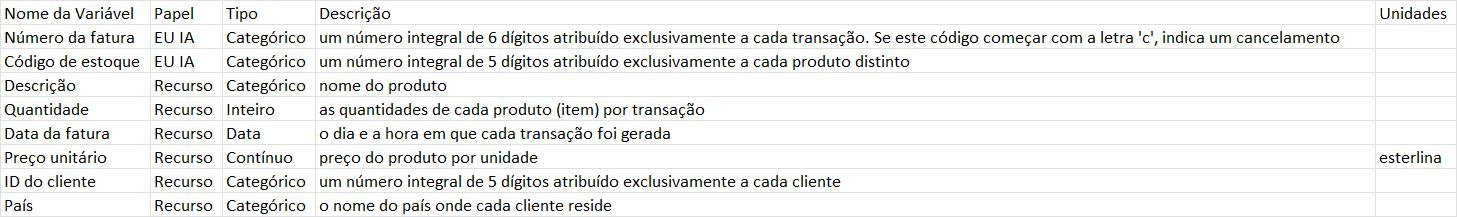

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importação de dados
file_path = 'C:\\Users\\geral\\Desktop\\JUPITER\\Online+Retail.xlsx'

#file_path = 'C:\\Users\\frank\\OneDrive\\Área de Trabalho\\Projeto-1\\Online+Retail.xlsx'

df = pd.read_excel(file_path)

In [3]:
#Vizualiação tipos de dados
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
#Vizualização data frame
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#Criação do SalesTotal
df['SalesTotals'] = round(df['Quantity']*df['UnitPrice'],1)

In [6]:
#Percentual de NA's
((len(df) / df.count())-1).round(3)

InvoiceNo      0.000
StockCode      0.000
Description    0.003
Quantity       0.000
InvoiceDate    0.000
UnitPrice      0.000
CustomerID     0.332
Country        0.000
SalesTotals    0.000
dtype: float64

In [7]:
#DataSet Filtrando 'c' Cancelados
df_cancelados = df[df['InvoiceNo'].str.startswith('C', na=False)]
print('Total de Cancelamentos: ',len(df_cancelados))

#DataSet Filtrado Cancelados
df = df[~df['InvoiceNo'].isin(df_cancelados['InvoiceNo'])]
print('Total de Vendas Sem cancelamentos: ',len(df))
print('Percentual de Cancelamento: ', round(len(df_cancelados)/len(df),2),'%')

Total de Cancelamentos:  9288
Total de Vendas Sem cancelamentos:  532621
Percentual de Cancelamento:  0.02 %


In [8]:
len(df['InvoiceNo'])

532621

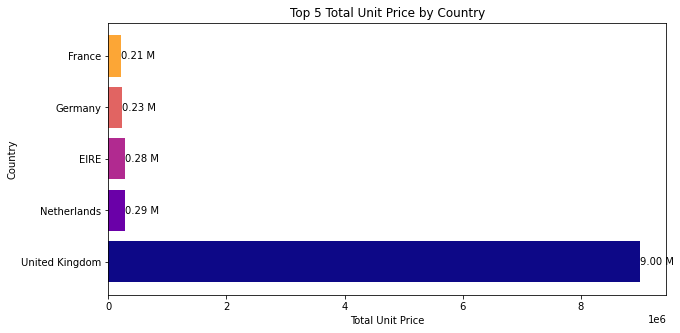

In [9]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['SalesTotals'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo

# Config
plt.xlabel('Total Unit Price')
plt.ylabel('Country')
plt.title('Top 5 Total Unit Price by Country')


plt.show()


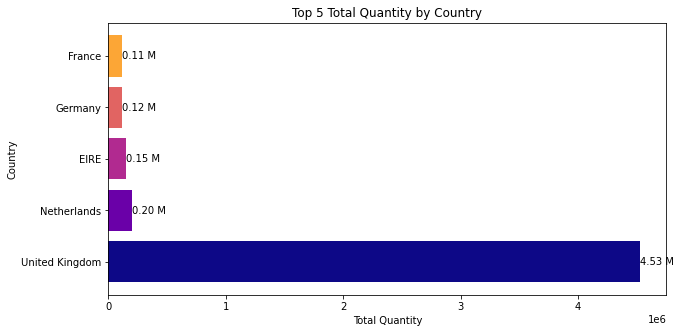

In [10]:
plt.figure(figsize=(10, 5))
for i, (country, value) in enumerate(df.groupby('Country')['Quantity'].sum().nlargest(5).items()):
    plt.barh(country, value, color=plt.cm.plasma(i / 5))
    plt.text(value, i, f'{value /1e6:.2f} M', va='center')  # Adicionar rótulo
    
# Config
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.title('Top 5 Total Quantity by Country')


plt.show()

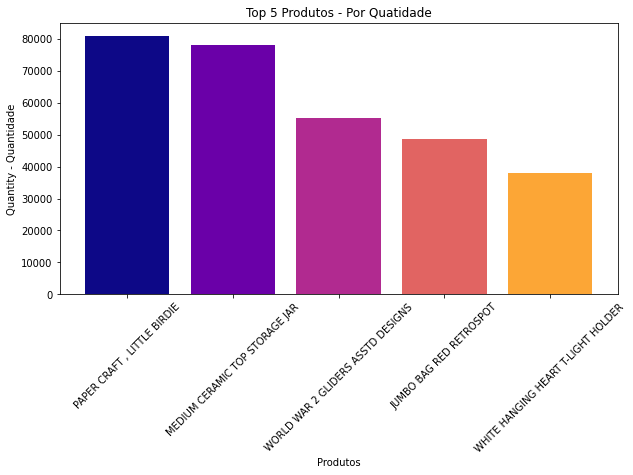

In [11]:
#Top 5 Produtos
plt.figure(figsize=(10, 5))
plt.bar(
    df.groupby('Description')['Quantity'].sum().nlargest(5).index,
    df.groupby('Description')['Quantity'].sum().nlargest(5).values,
    color=[plt.cm.plasma(i / 5) for i in range(5)],
    
   
)
# Config

plt.ylabel('Quantity - Quantidade')
plt.title('Top 5 Produtos - Por Quatidade')
plt.xlabel('Produtos')
plt.xticks(rotation=45)

plt.show()

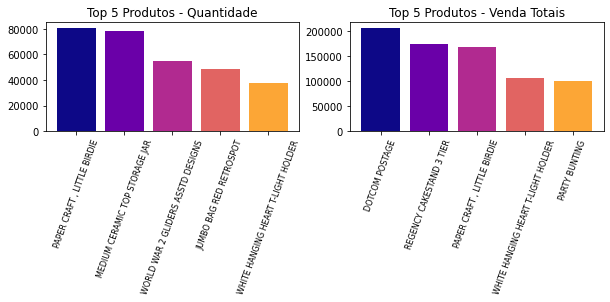

In [24]:
#Top 5 Produtos - Quantidades e Vendas

top_proucts_quantity = df.groupby('Description')['Quantity'].sum().nlargest(5)
label_quantity =  top_proucts_quantity.index
values_quantity = top_proucts_quantity.values

top_proucts_SalesTotals = df.groupby('Description')['SalesTotals'].sum().nlargest(5)
label_SalesTotals =  top_proucts_SalesTotals.index
values_SalesTotals = top_proucts_SalesTotals.values


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 2))

#### Grafico 1
ax1.bar(label_quantity, values_quantity, color=[plt.cm.plasma(i / 5) for i in range(5)])

# Define as localizações e rótulos dos ticks

ax1.set_title('Top 5 Produtos - Quantidade')
ax1.set_xticks(range(len(label_quantity)))
ax1.set_xticklabels(label_quantity, rotation=70, fontsize=8); 

#### Grafico 2

ax2.bar(label_SalesTotals, values_SalesTotals, color=[plt.cm.plasma(i / 5) for i in range(5)])

# Define as localizações e rótulos dos ticks

ax2.set_title('Top 5 Produtos - Venda Totais')
ax2.set_xticks(range(len(label_SalesTotals))) 
ax2.set_xticklabels(label_SalesTotals, rotation=70,fontsize=8);